Import Ultralytics

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.8/906.8 kB 39.5 MB/s eta 0:00:00


Checking if Ultralytics is loaded properly

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)


Load the YOLOv8 Model and other necessary libraries

In [ ]:
from ultralytics import YOLO
from IPython.display import Image

Import Roboflow and load the dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="yGjNOQYDYbnOqpzTKa2R")
project = rf.workspace("tamannas-workspace").project("counting-honeybees-new")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to counting-honeybees-new-1 in yolov8:: 100%|██████████| 9768/9768 [00:02<00:00, 4799.66it/s]


Set the dataset location

In [ ]:
dataset_path = "/content/counting-honeybees-new-1"

Train the YOLOv8 model

Upload the previously trained yolov8 model and retrain using this dataset

Epochs: 300

Model: Previously trained model (best.pt from second training)

In [ ]:
!yolo task=detect mode=train data='/content/counting-honeybees-new-1/data.yaml' model="best.pt" epochs=300 imgsz=640

100% 21.5M/21.5M [00:00<00:00, 102MB/s]
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/counting-honeybees-new-1/data.yaml, epochs=300, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sav

Evaluate the model

In [ ]:
from ultralytics import YOLO

# Load your trained model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Validate the model on the validation dataset
results = model.val(data="/content/counting-honeybees-new-1/data.yaml", conf=0.25)

# Extract metrics
# Access precision values using the 'p' attribute directly on 'results.box'
precision = results.box.p.mean()  # Average precision across classes
recall = results.box.r.mean()        # Average recall across classes
map50 = results.box.map50                 # mAP@0.5
map50_95 = results.box.map                # mAP@0.5:0.95


# Print metrics in percentage format
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"mAP@0.5: {map50 * 100:.2f}%")
print(f"mAP@0.5:0.95: {map50_95 * 100:.2f}%")

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/counting-honeybees-new-1/valid/labels.cache... 933 images, 0 backgrounds, 0 corrupt: 100%|██████████| 933/933 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:12<00:00,  4.61it/s]


                   all        933      12188      0.958       0.89      0.947       0.72
Speed: 0.3ms preprocess, 5.2ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val
Precision: 95.83%
Recall: 89.00%
mAP@0.5: 94.65%
mAP@0.5:0.95: 72.00%


Save the model

In [ ]:
!zip -r retrain-new-yolo8.zip runs

  adding: runs/ (stored 0%)
  adding: runs/detect/ (stored 0%)
  adding: runs/detect/val/ (stored 0%)
  adding: runs/detect/val/confusion_matrix.png (deflated 36%)
  adding: runs/detect/val/P_curve.png (deflated 27%)
  adding: runs/detect/val/val_batch0_pred.jpg (deflated 7%)
  adding: runs/detect/val/val_batch2_labels.jpg (deflated 6%)
  adding: runs/detect/val/F1_curve.png (deflated 20%)
  adding: runs/detect/val/PR_curve.png (deflated 22%)
  adding: runs/detect/val/val_batch0_labels.jpg (deflated 7%)
  adding: runs/detect/val/val_batch2_pred.jpg (deflated 5%)
  adding: runs/detect/val/confusion_matrix_normalized.png (deflated 36%)
  adding: runs/detect/val/val_batch1_labels.jpg (deflated 8%)
  adding: runs/detect/val/R_curve.png (deflated 19%)
  adding: runs/detect/val/val_batch1_pred.jpg (deflated 8%)
  adding: runs/detect/train/ (stored 0%)
  adding: runs/detect/train/confusion_matrix.png (deflated 36%)
  adding: runs/detect/train/P_curve.png (deflated 22%)
  adding: runs/detect/t

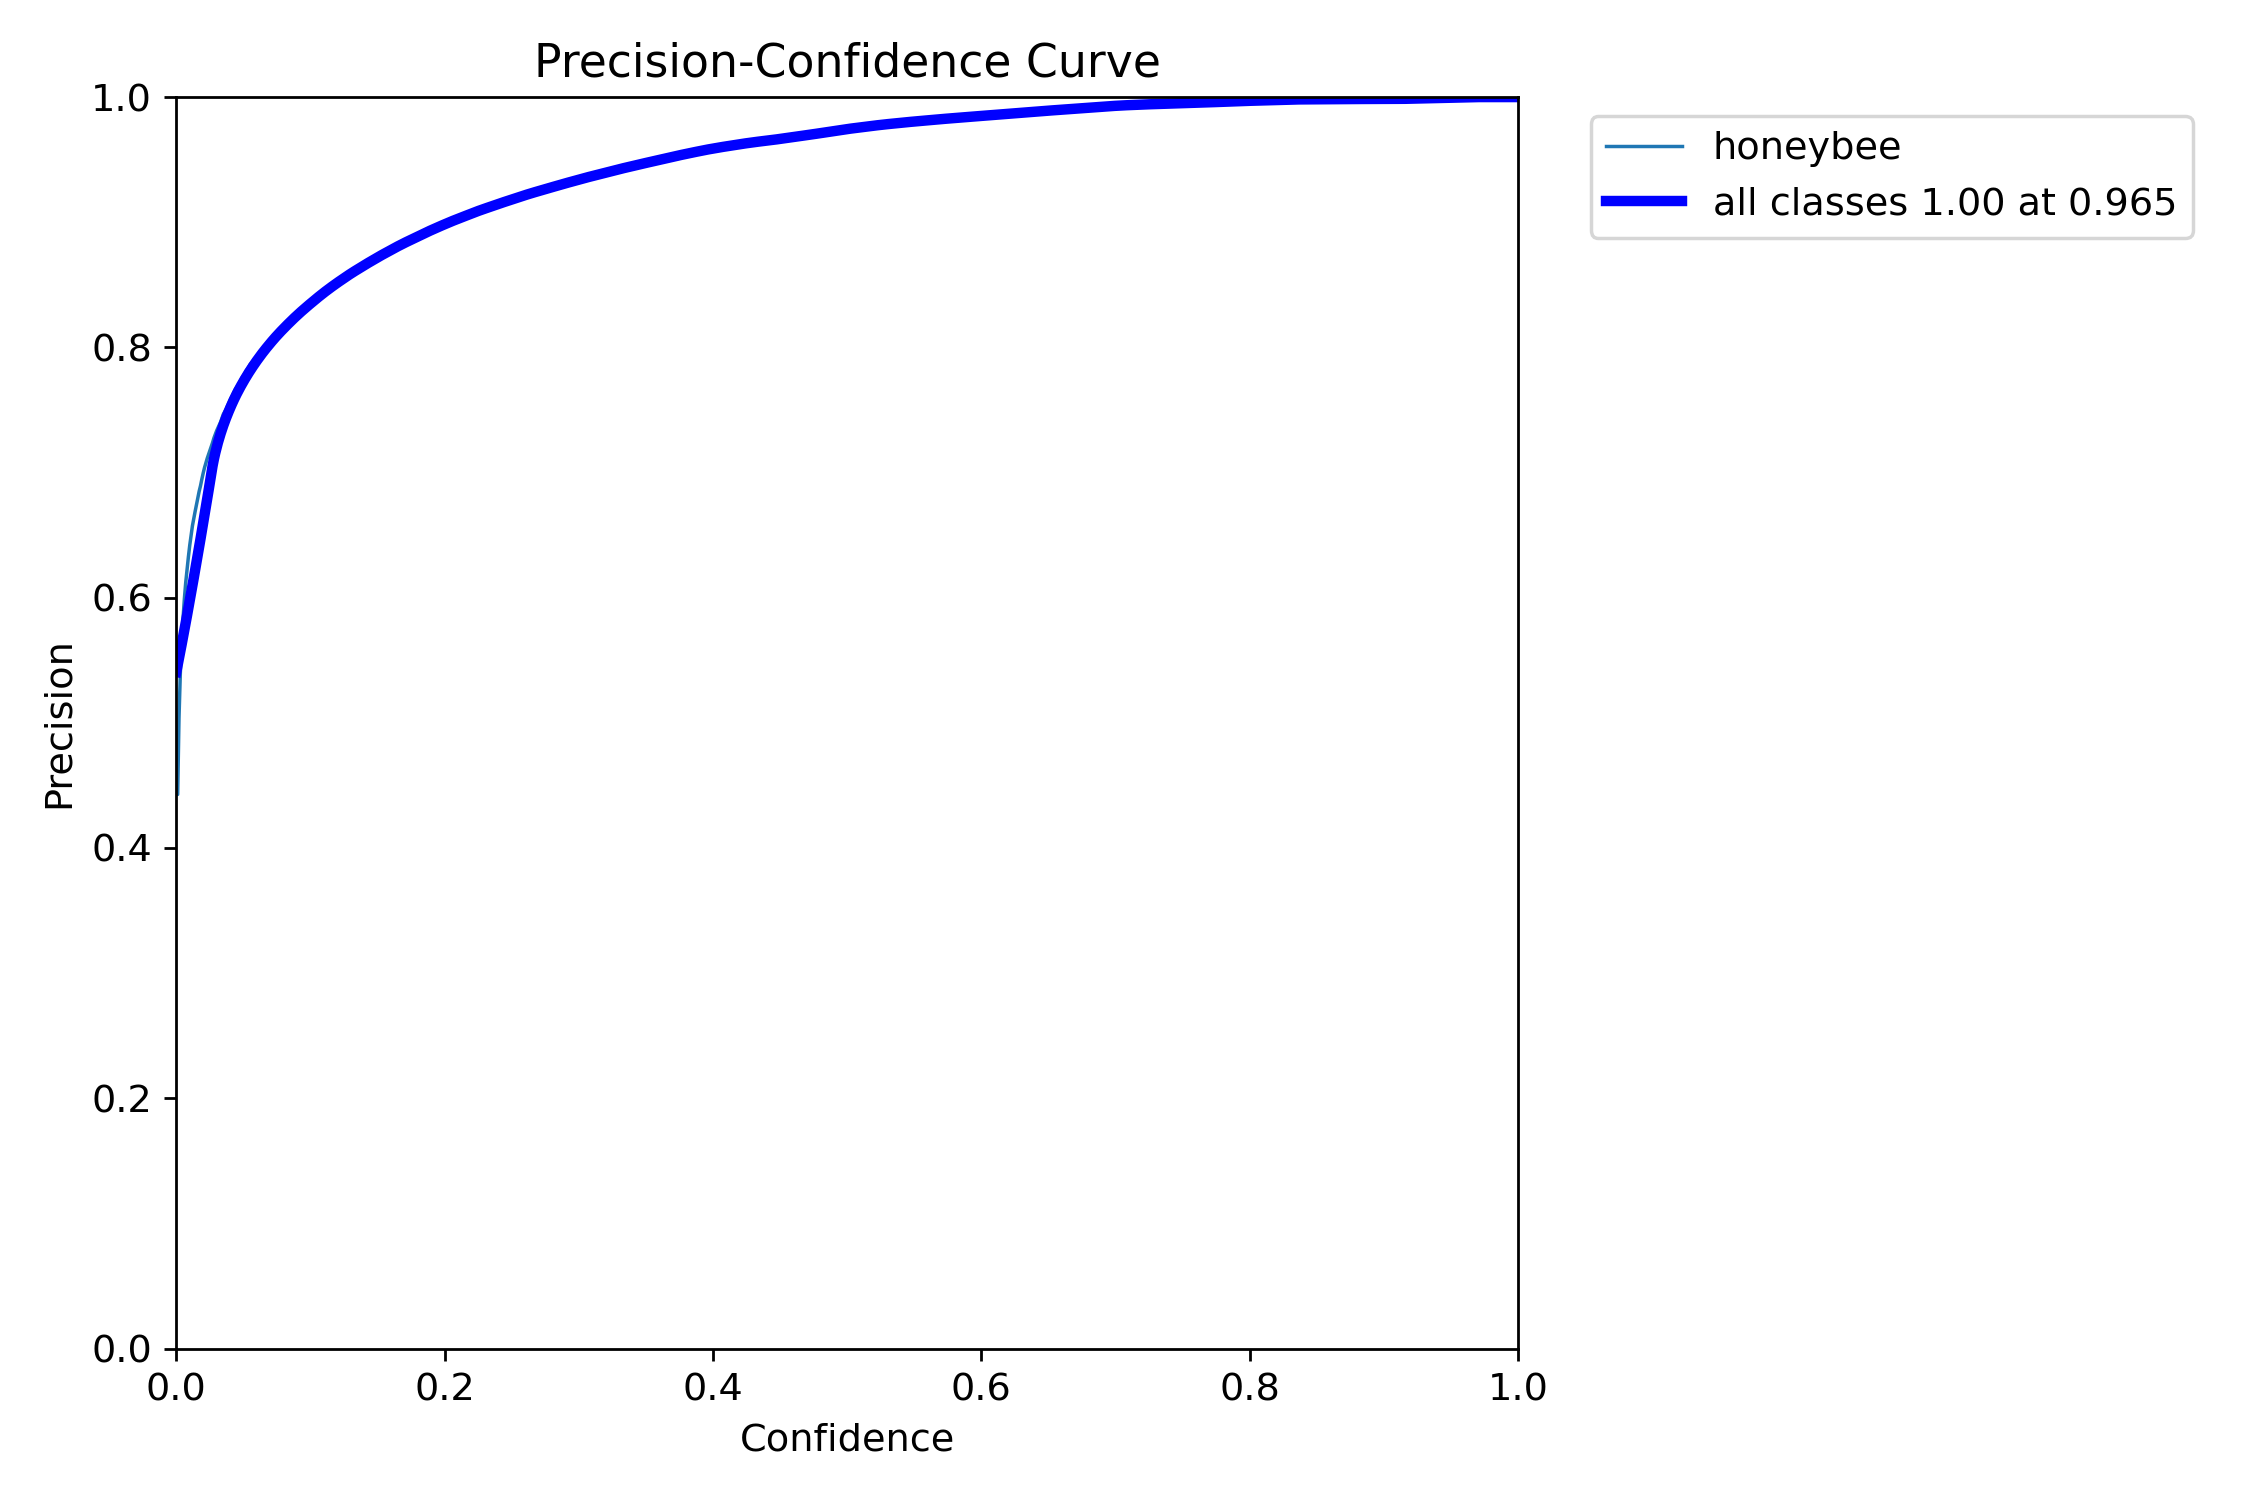

In [ ]:
Image("/content/runs/detect/train/P_curve.png", width=600)

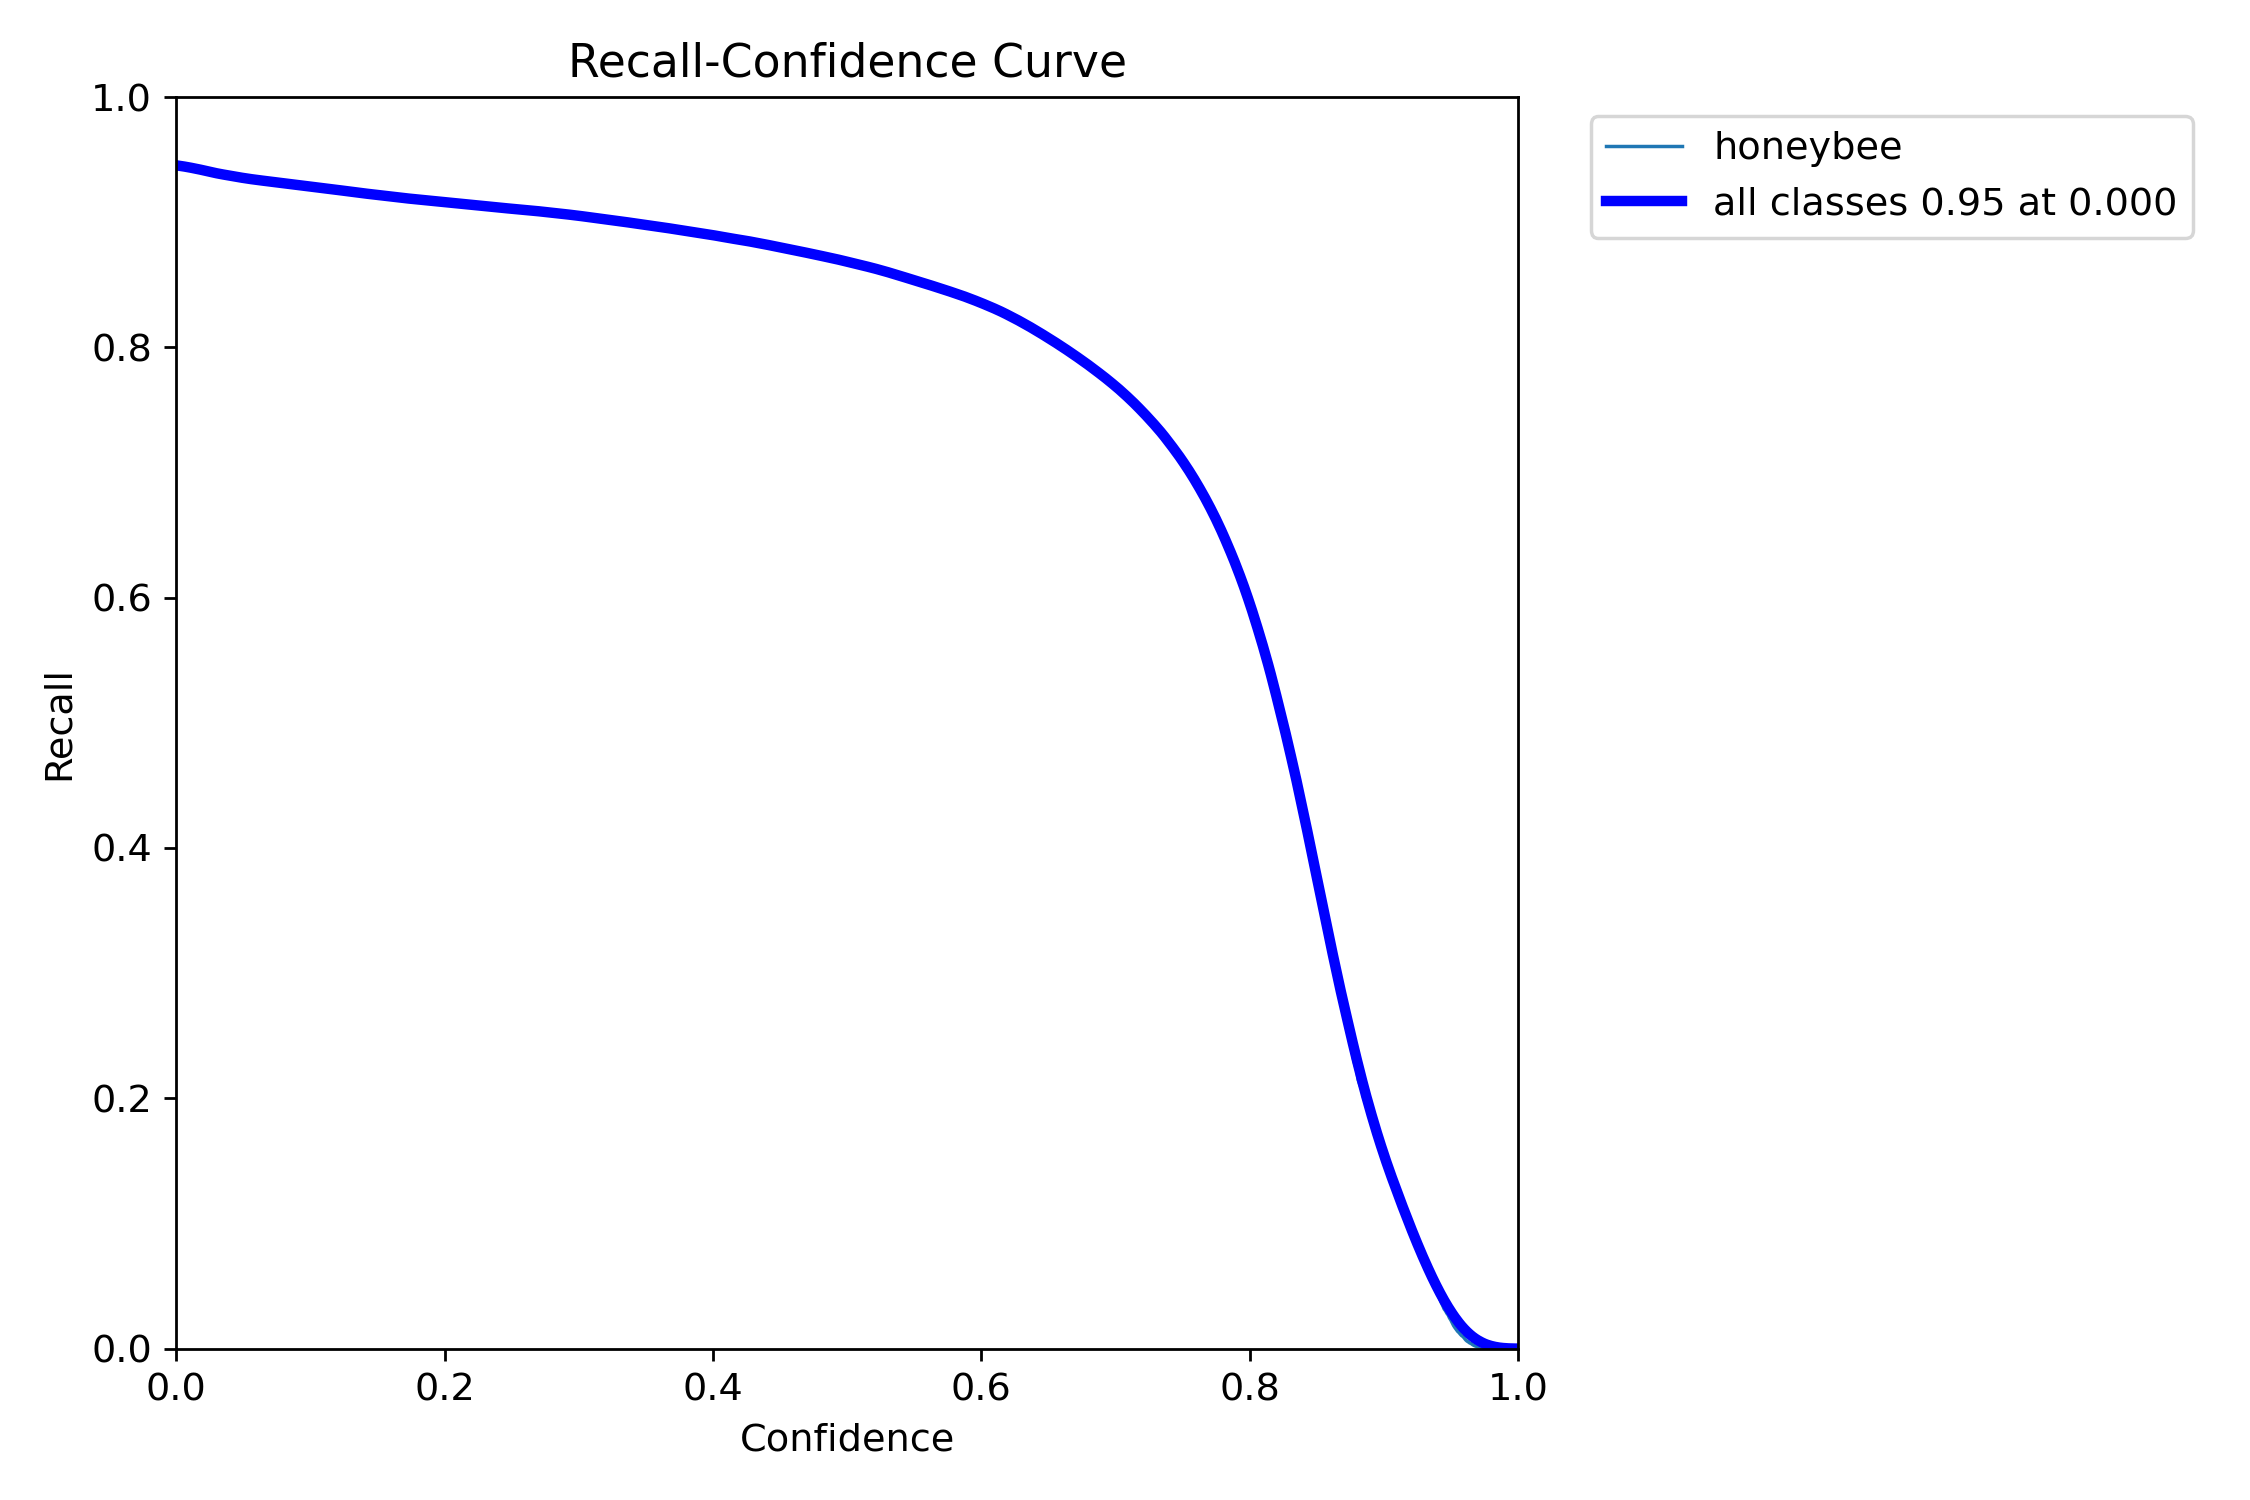

In [ ]:
Image("/content/runs/detect/train/R_curve.png", width=600)

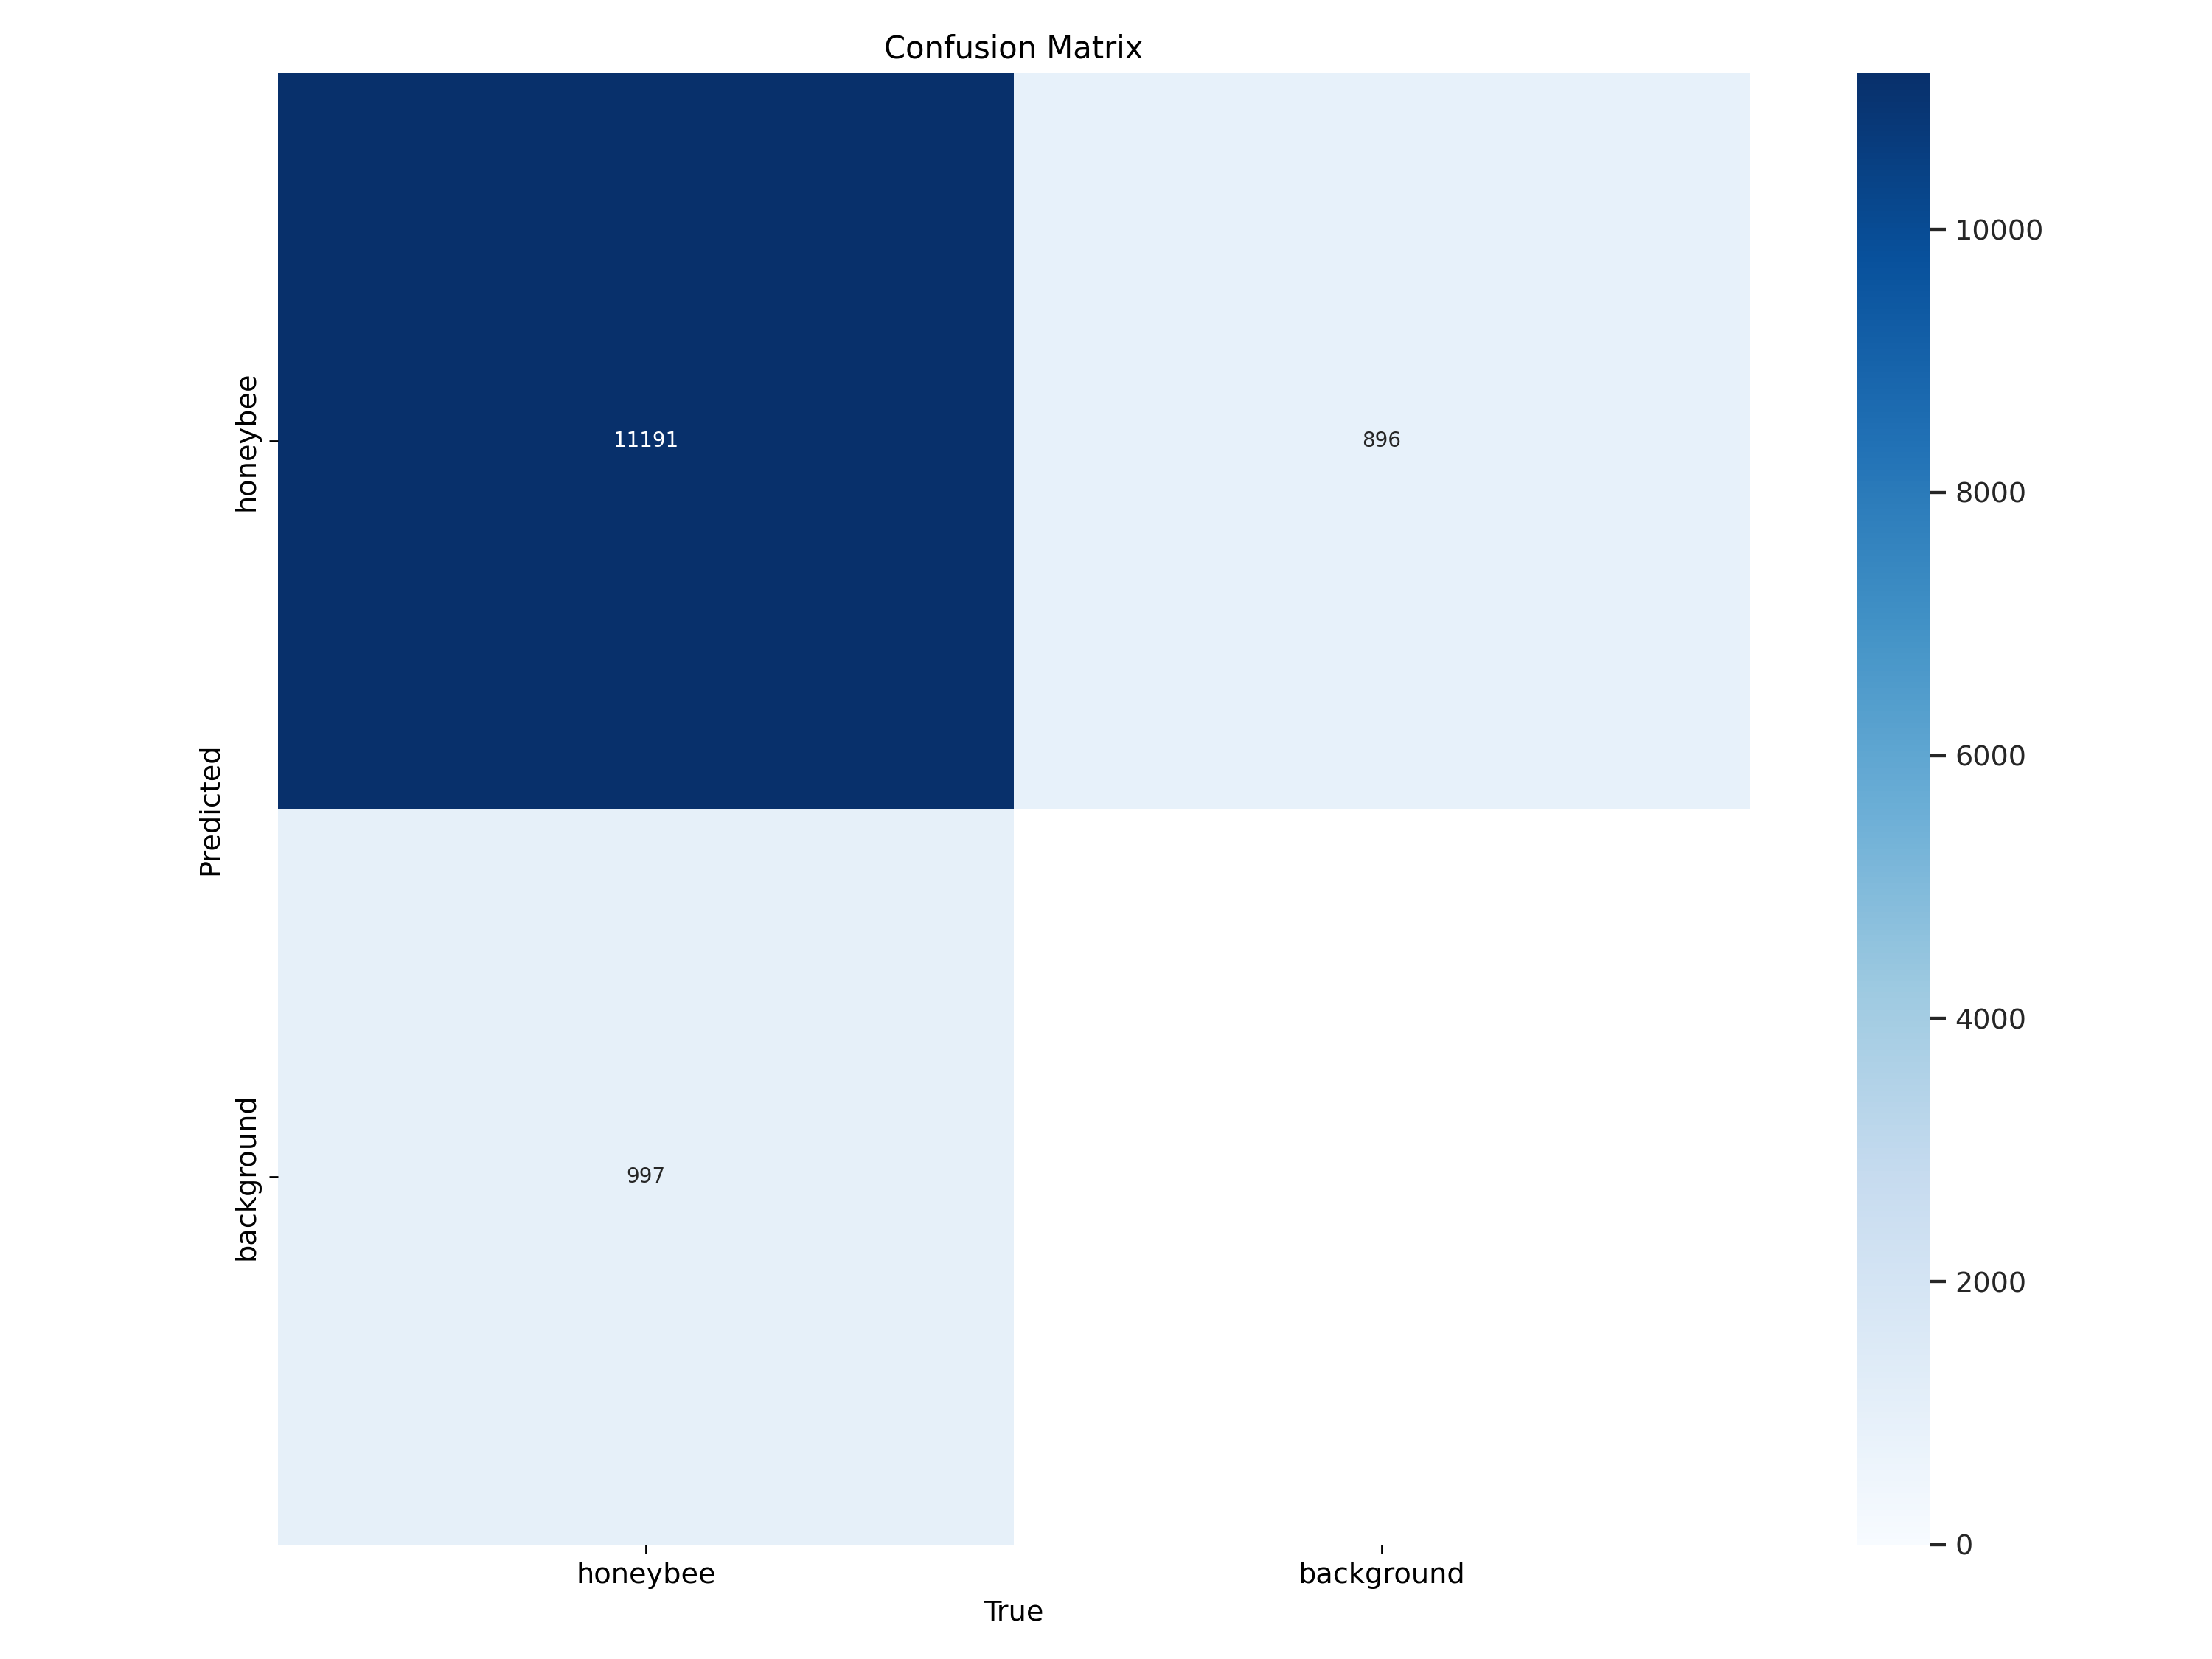

In [ ]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

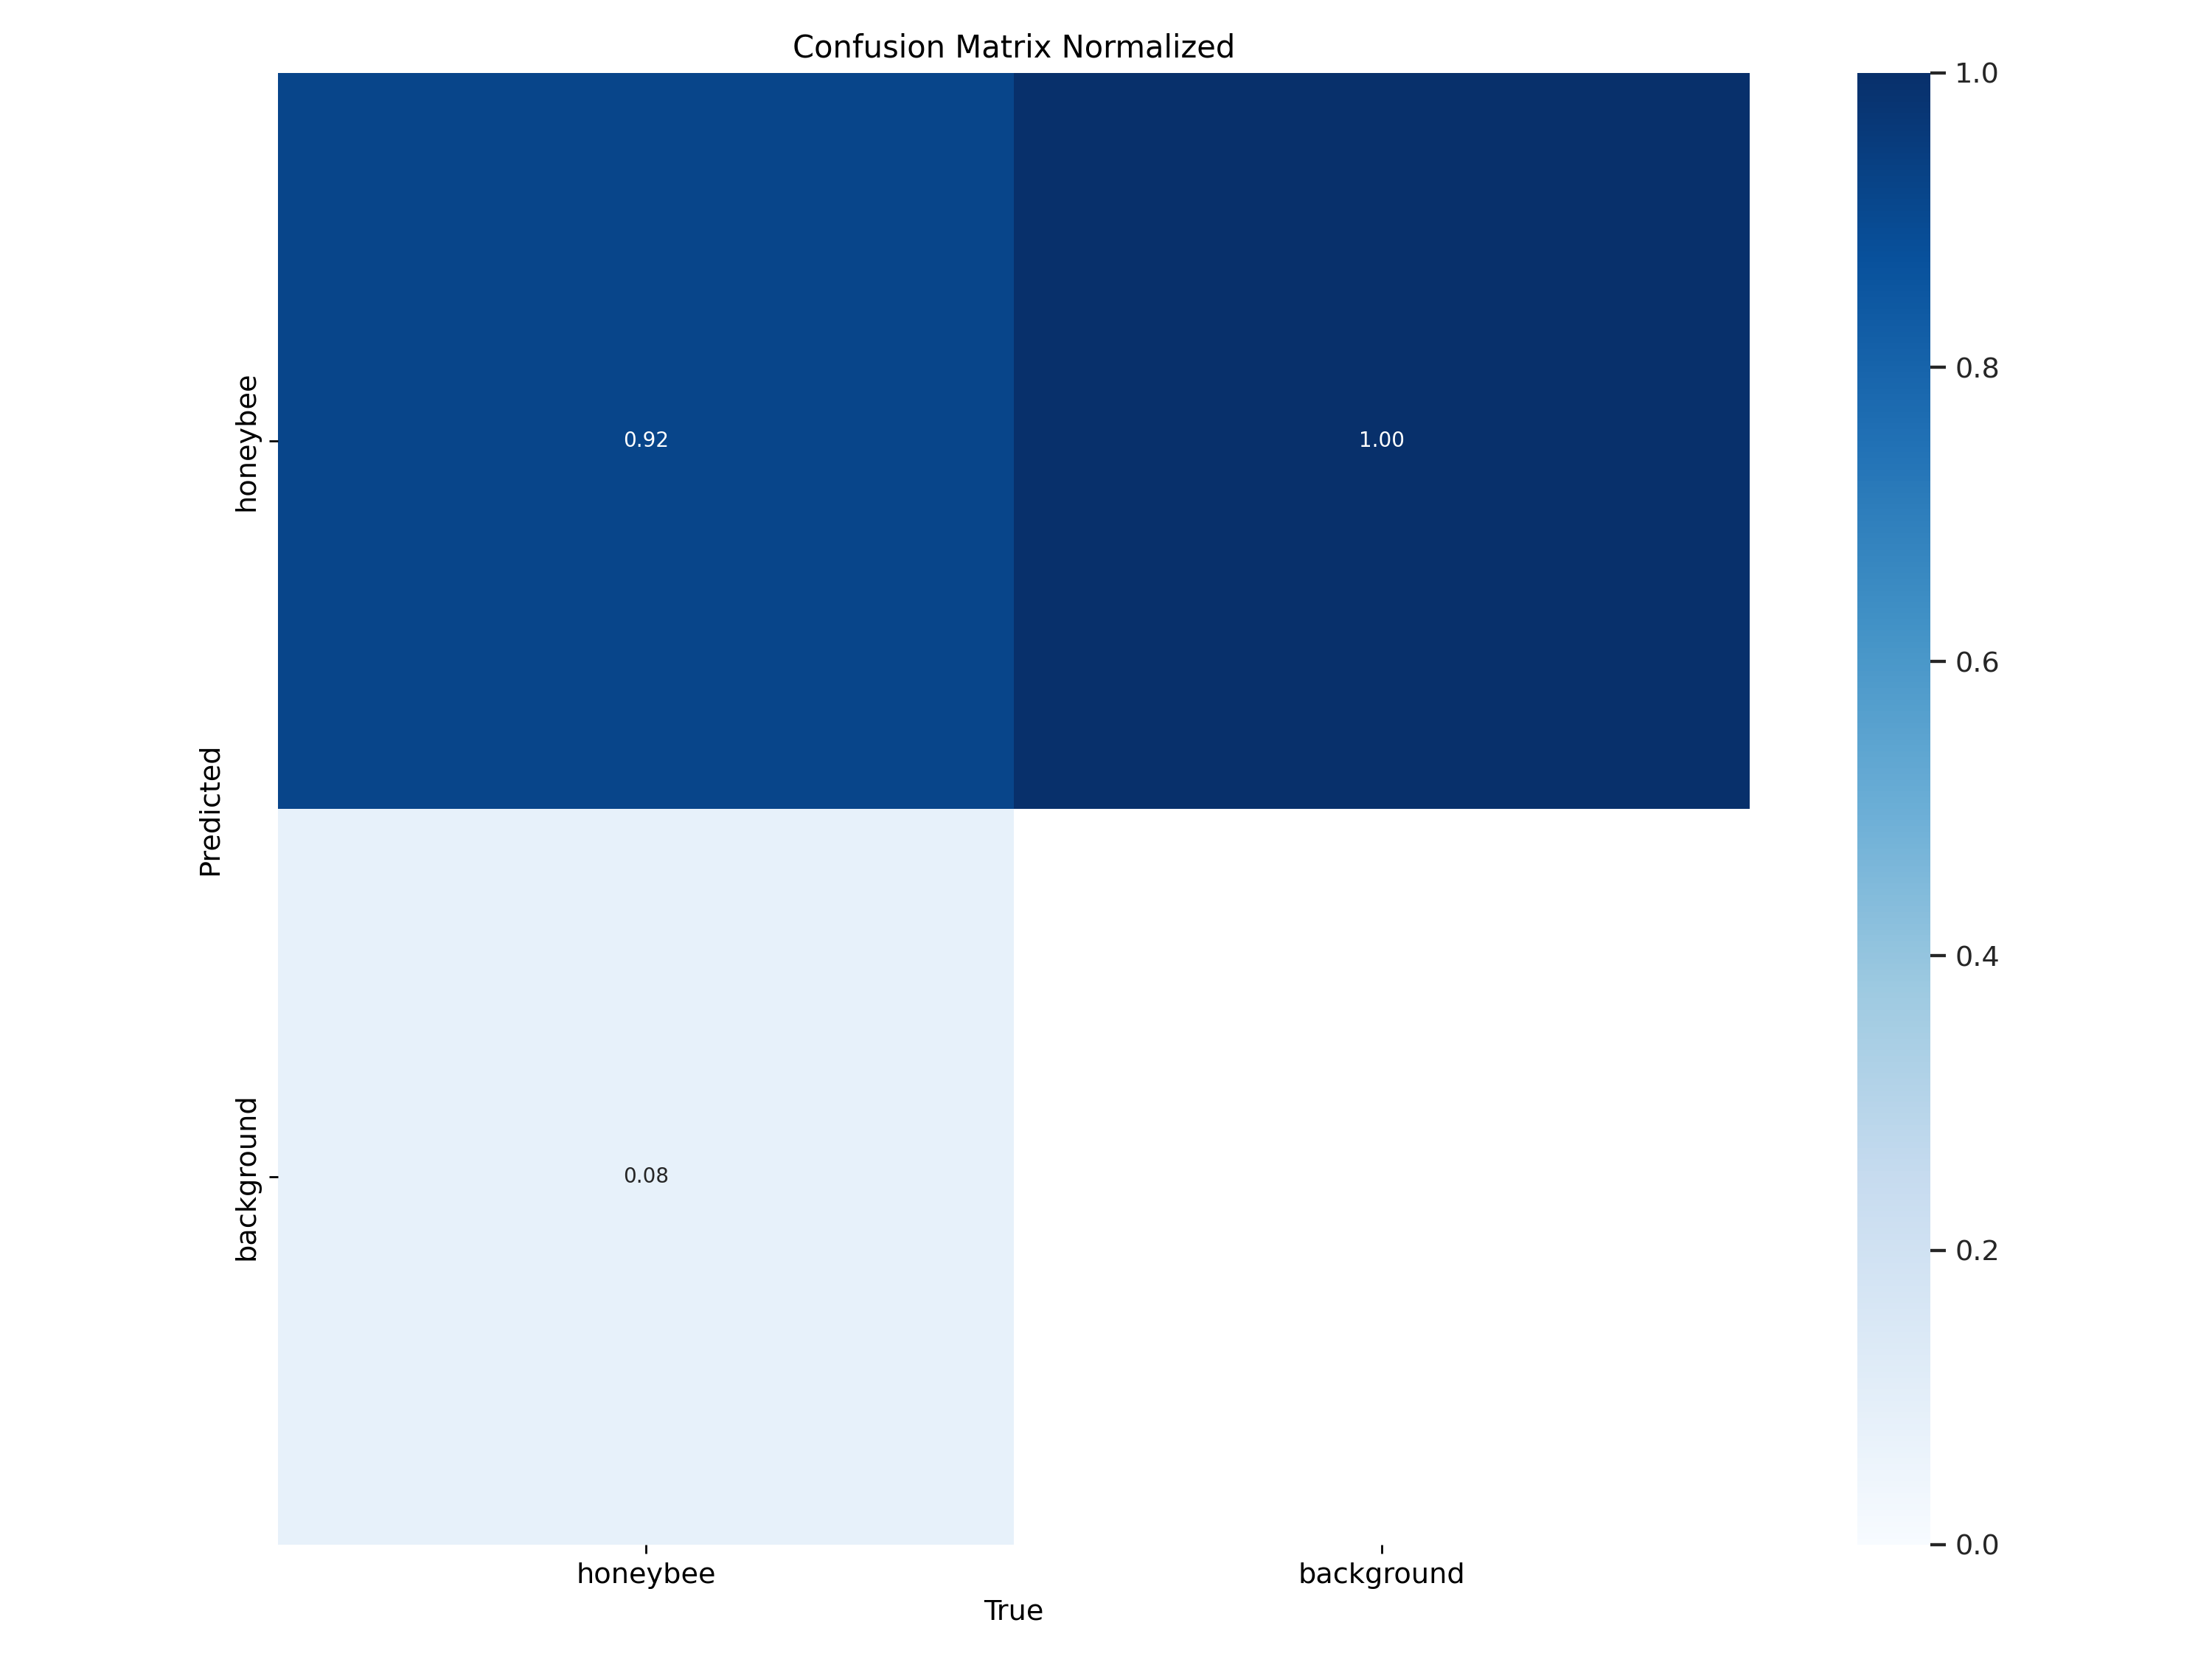

In [ ]:
Image("/content/runs/detect/train/confusion_matrix_normalized.png", width=600)

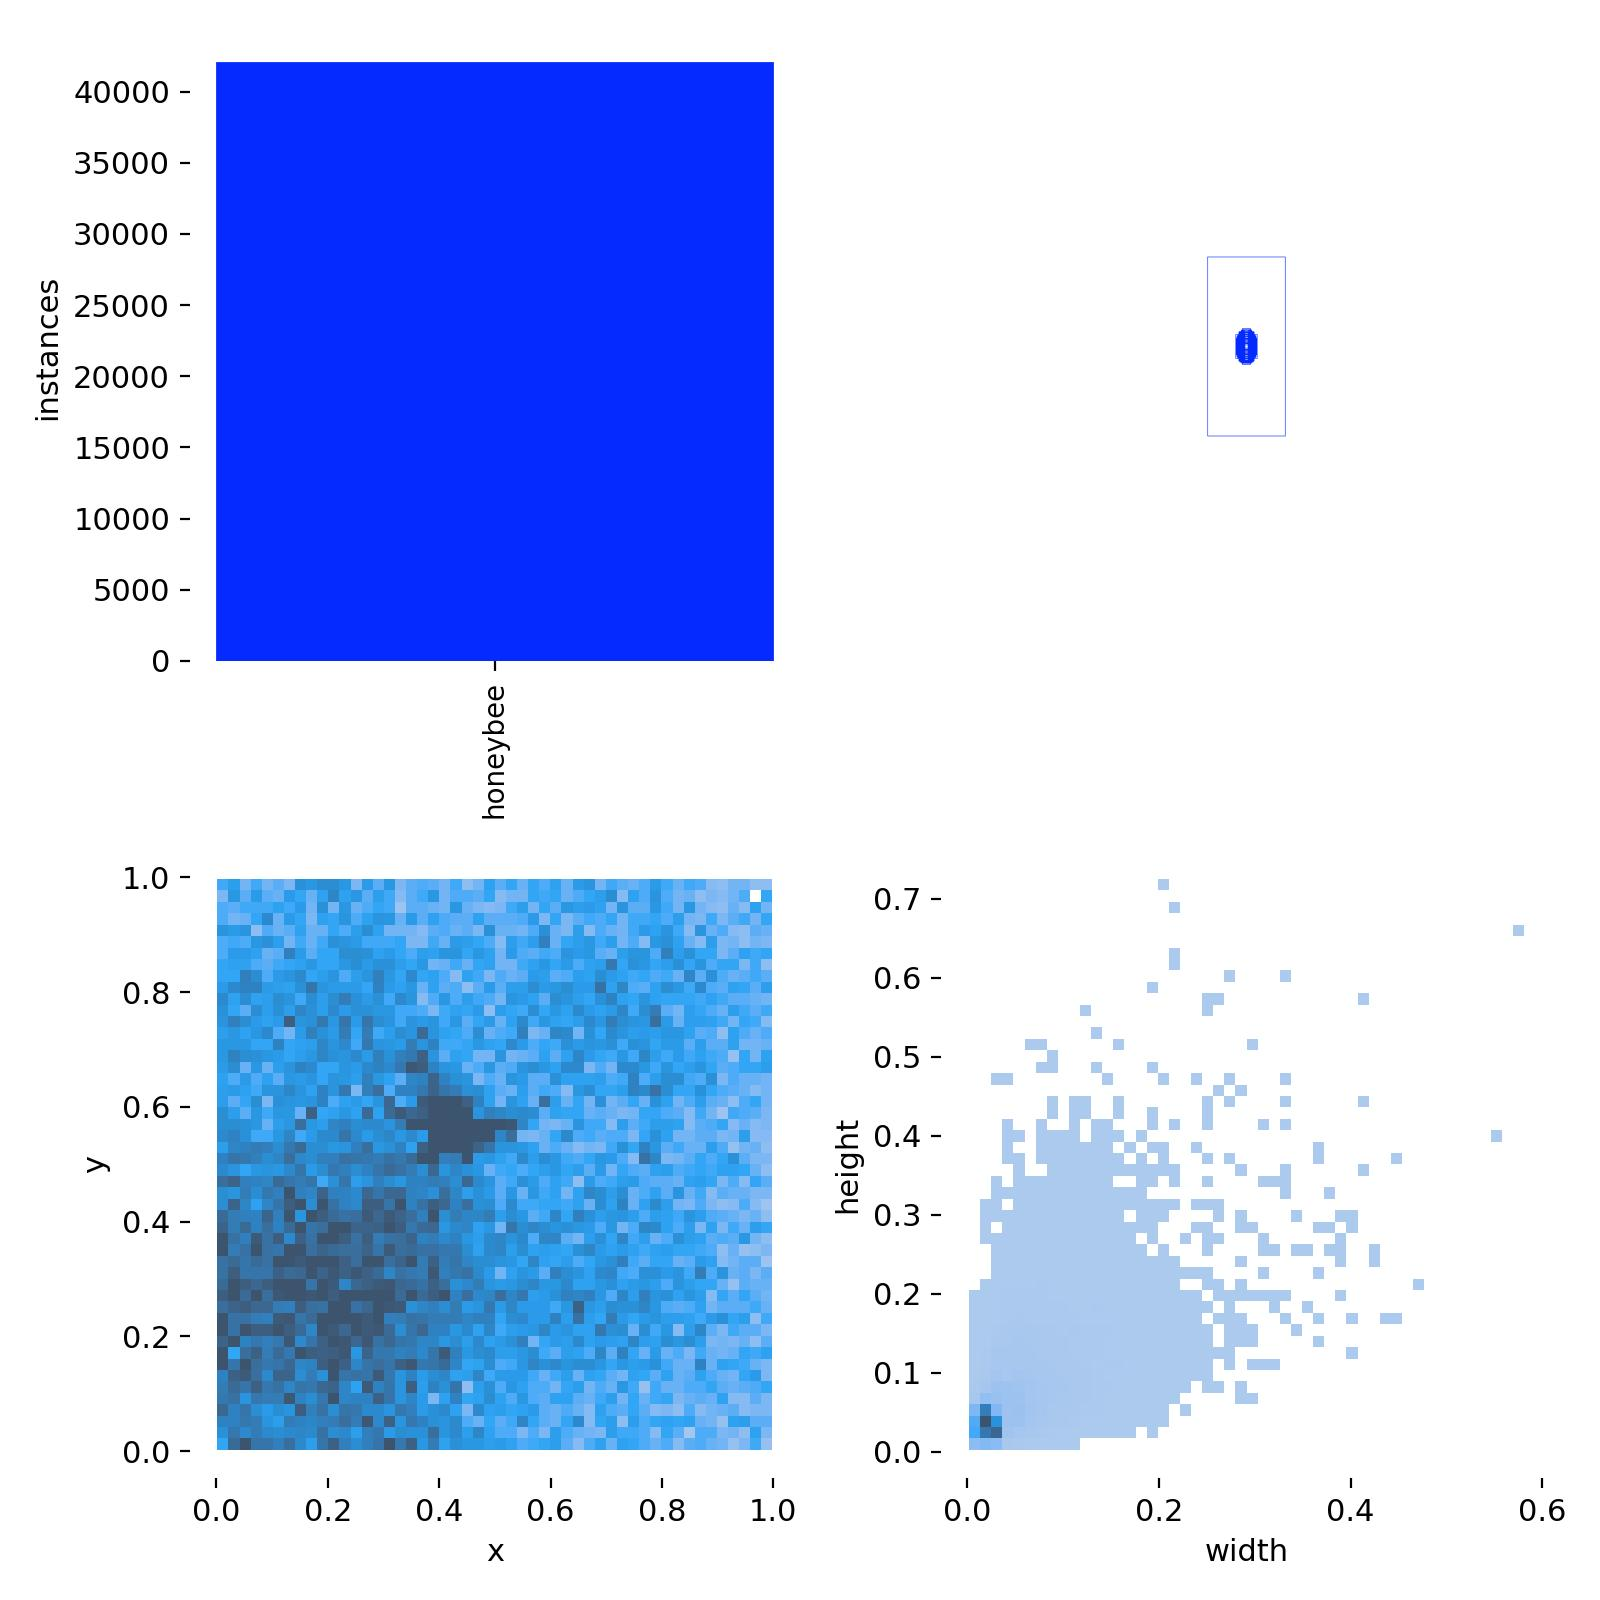

In [ ]:
Image("/content/runs/detect/train/labels.jpg", width=600)

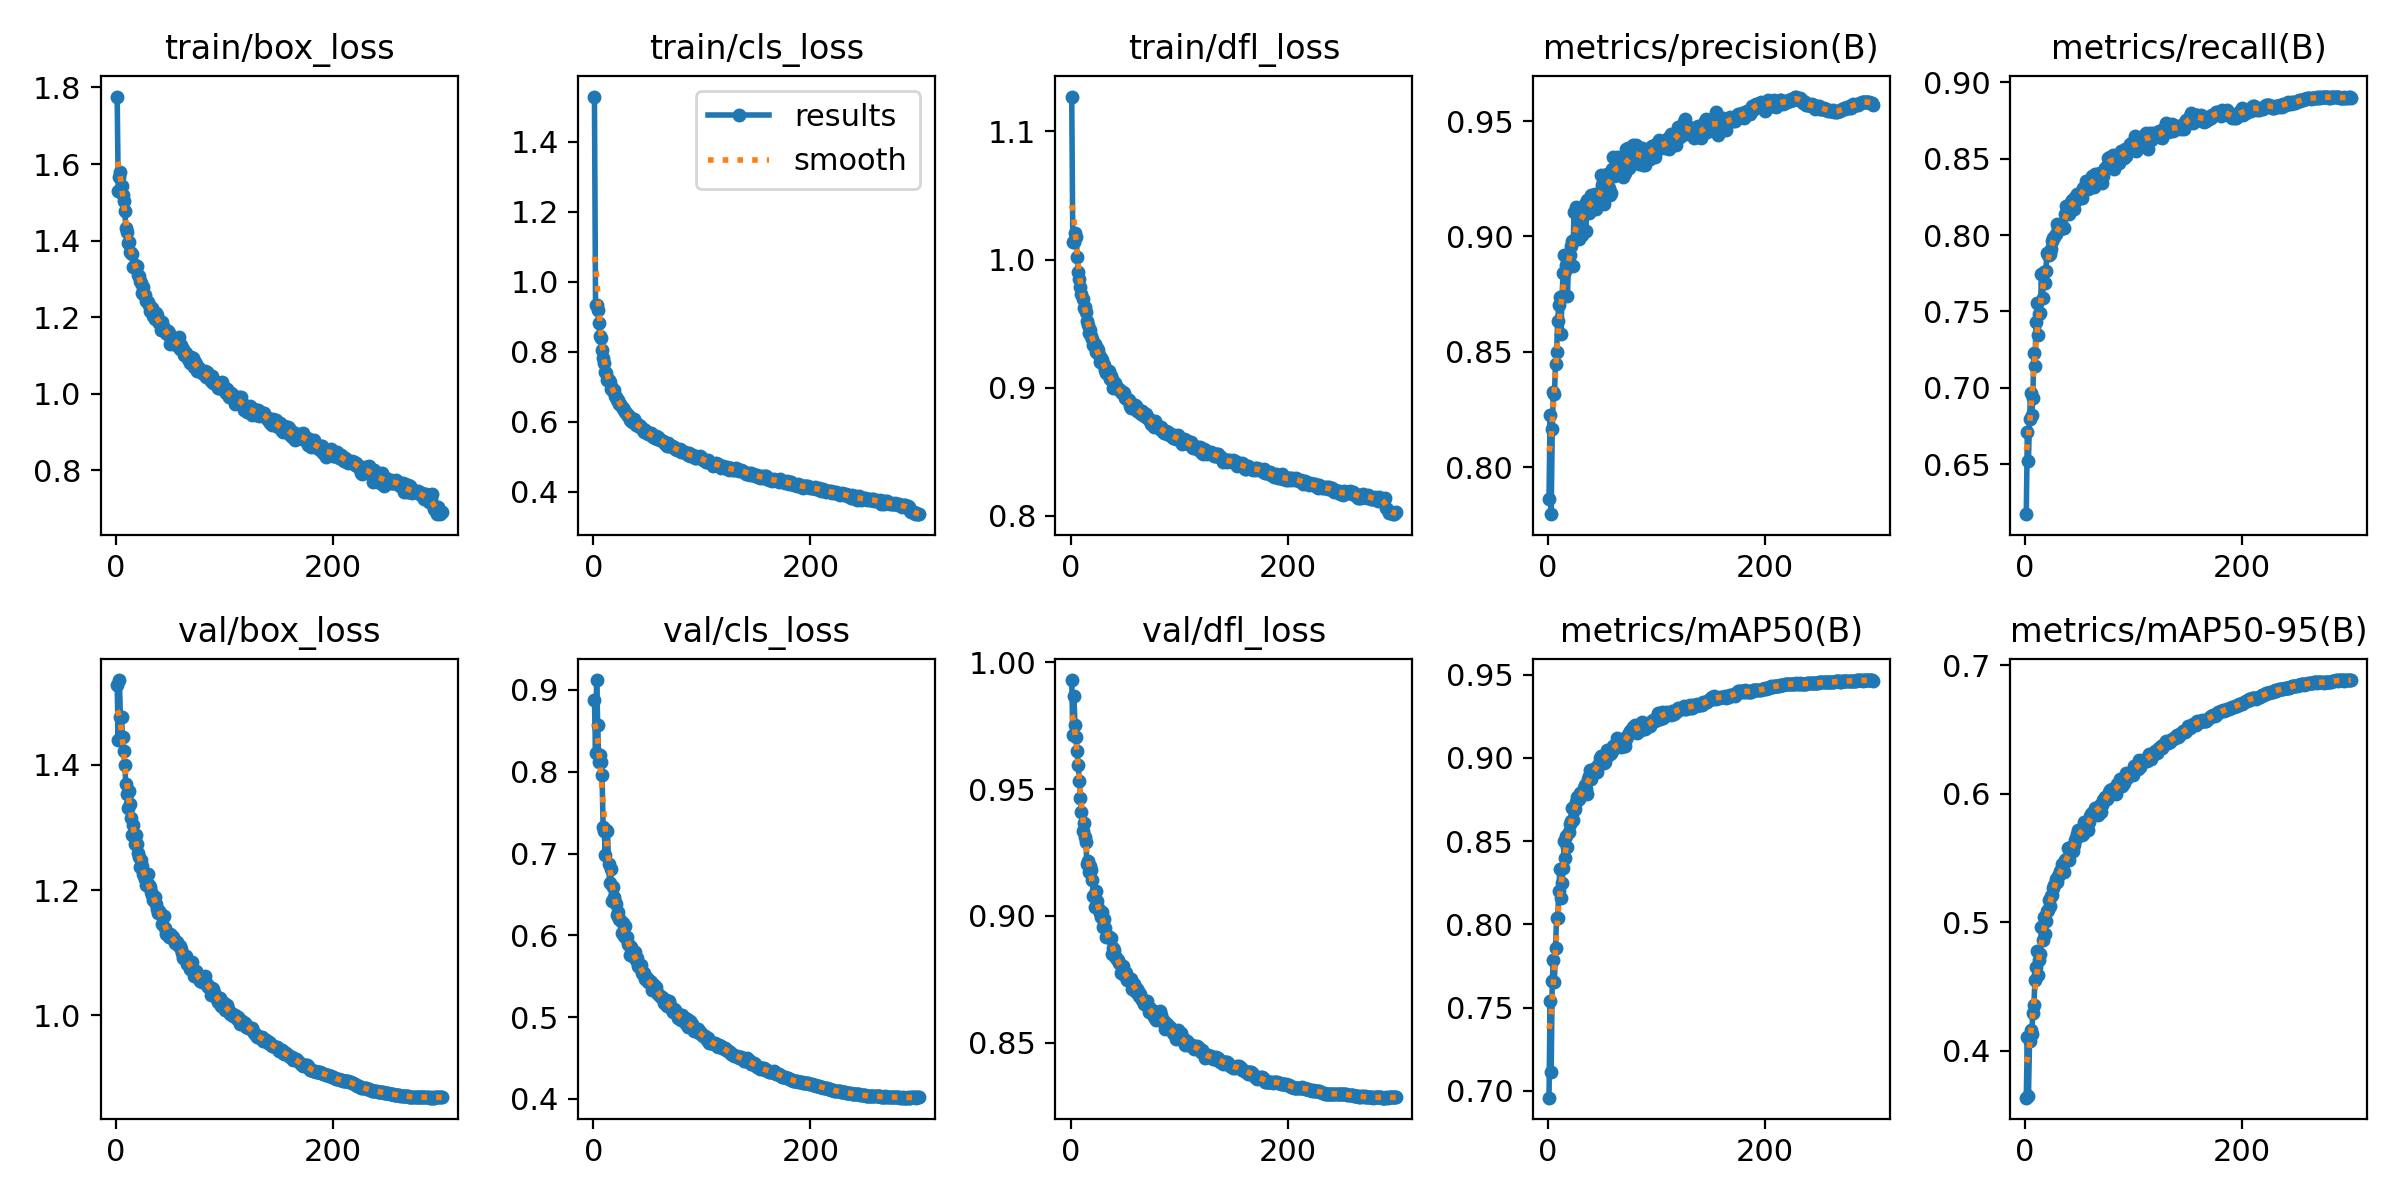

In [ ]:
Image("/content/runs/detect/train/results.png", width=600)

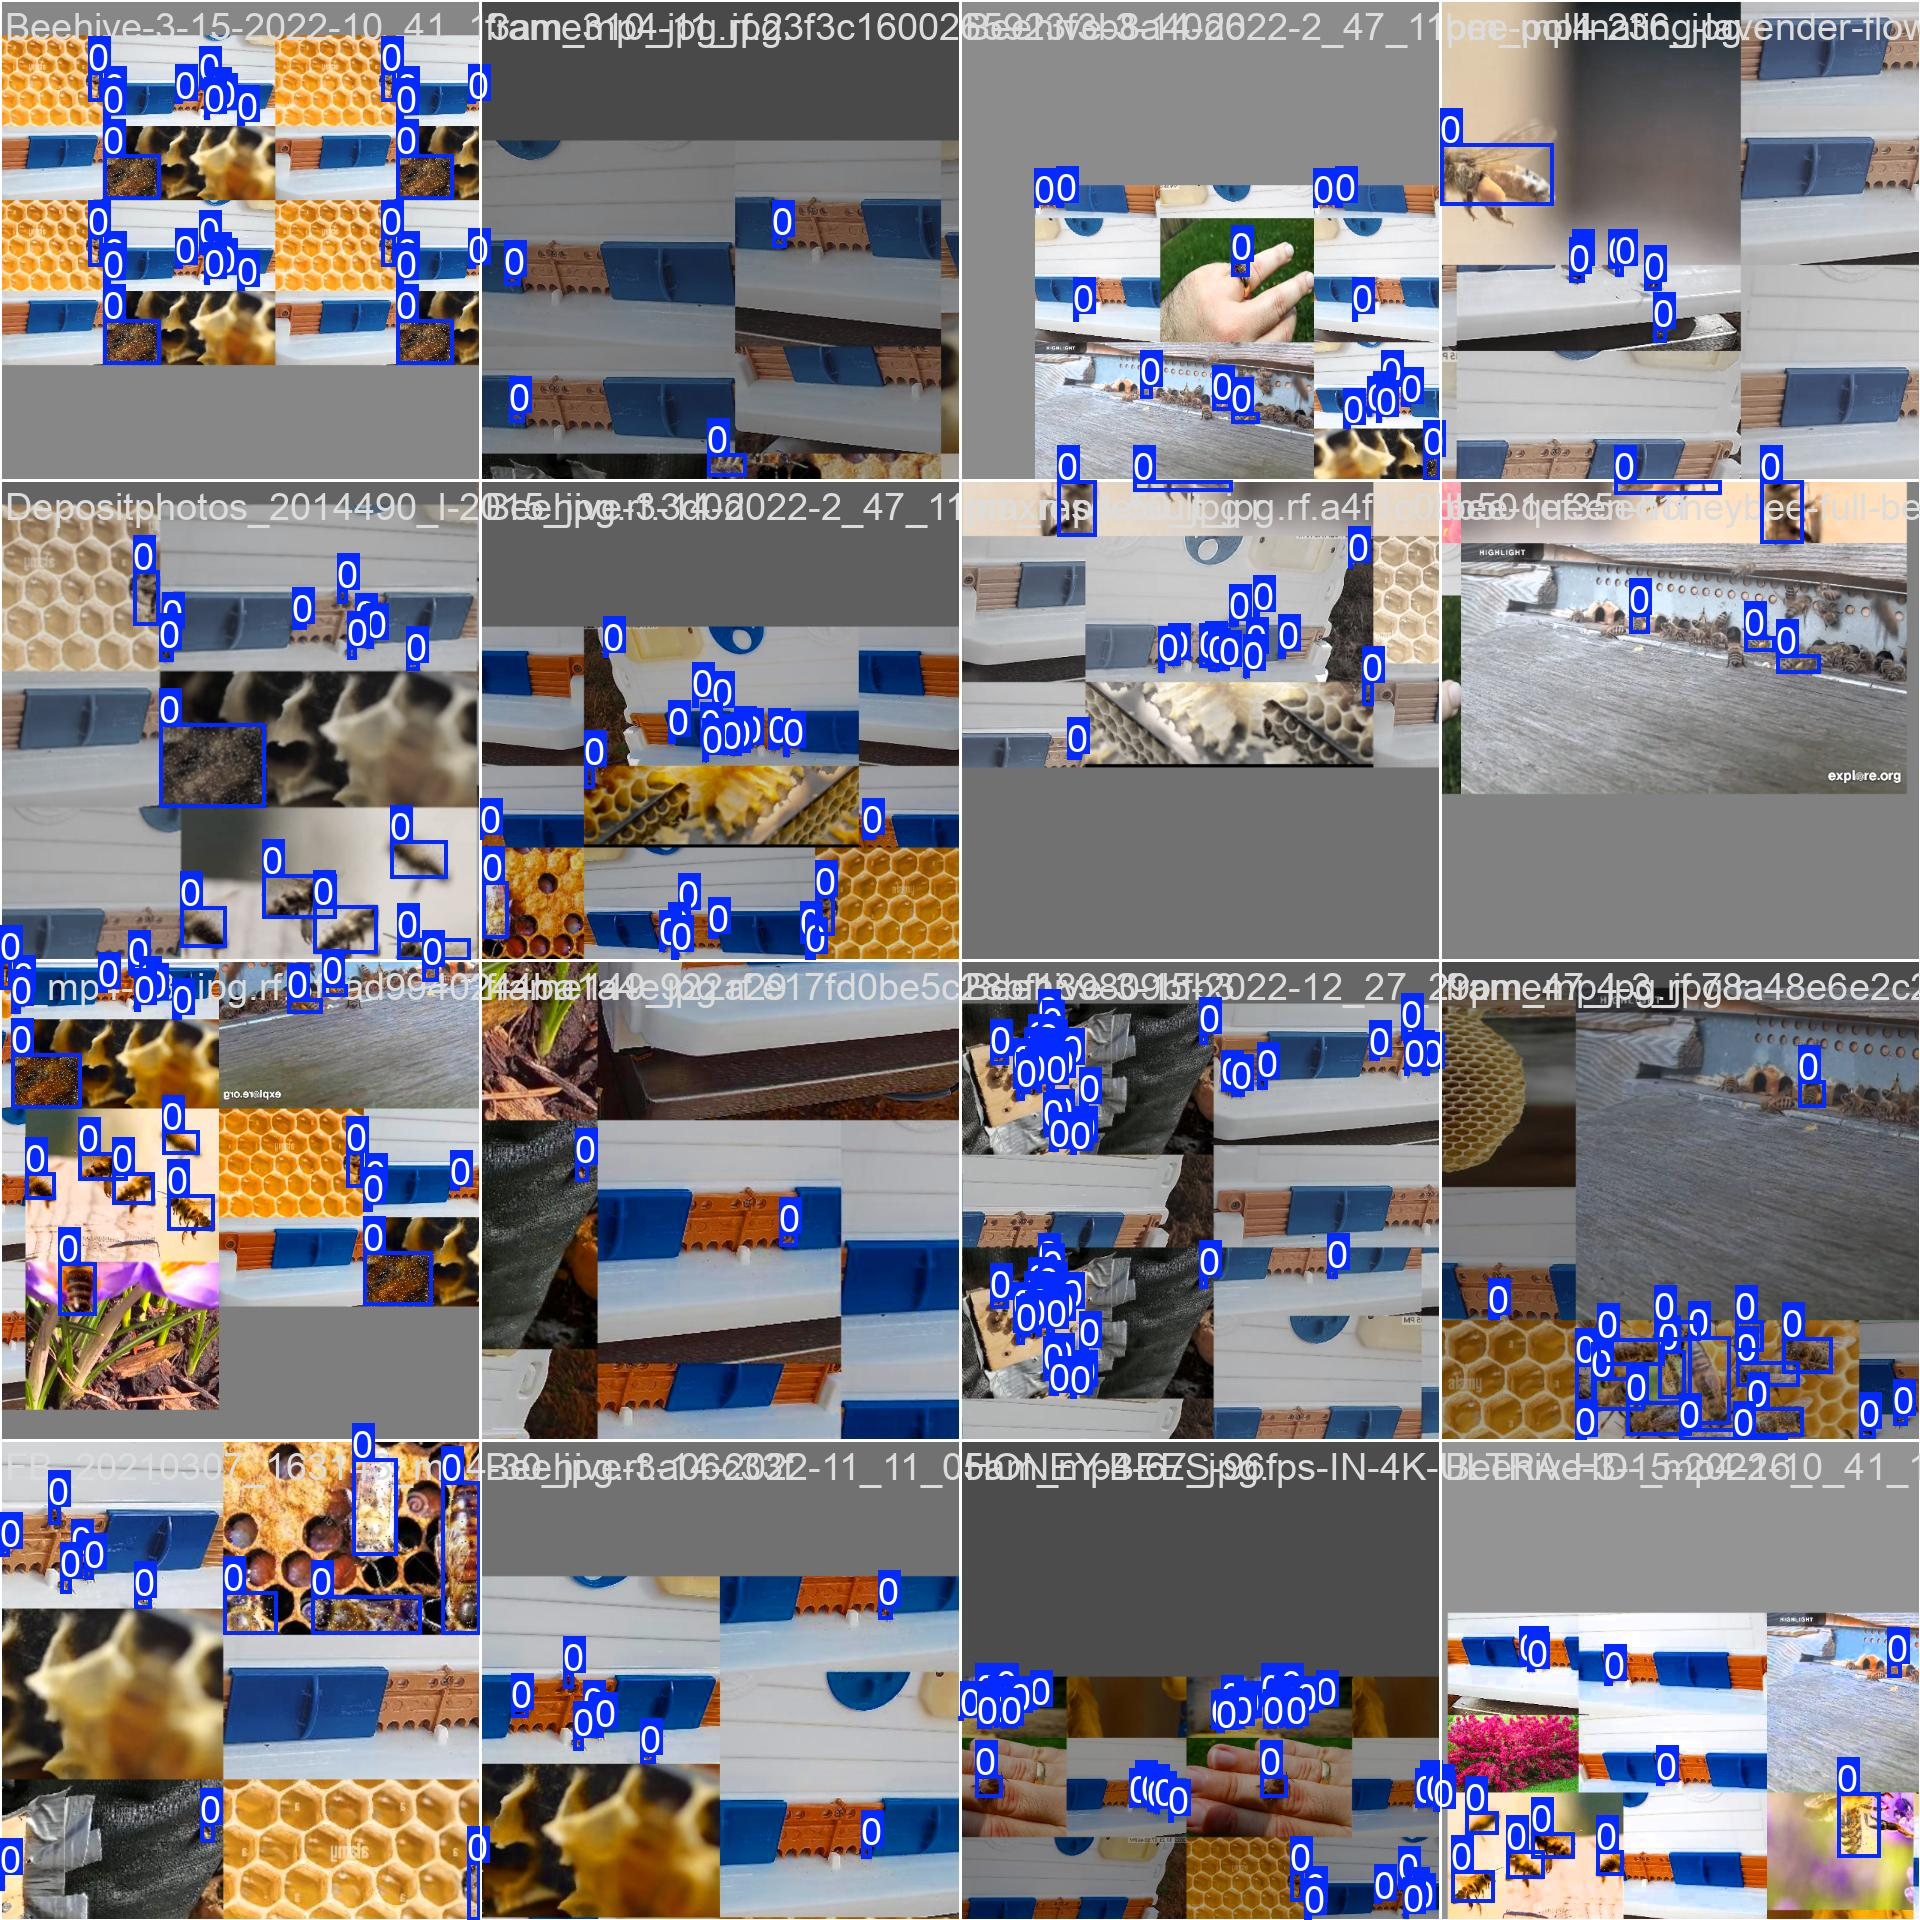

In [ ]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

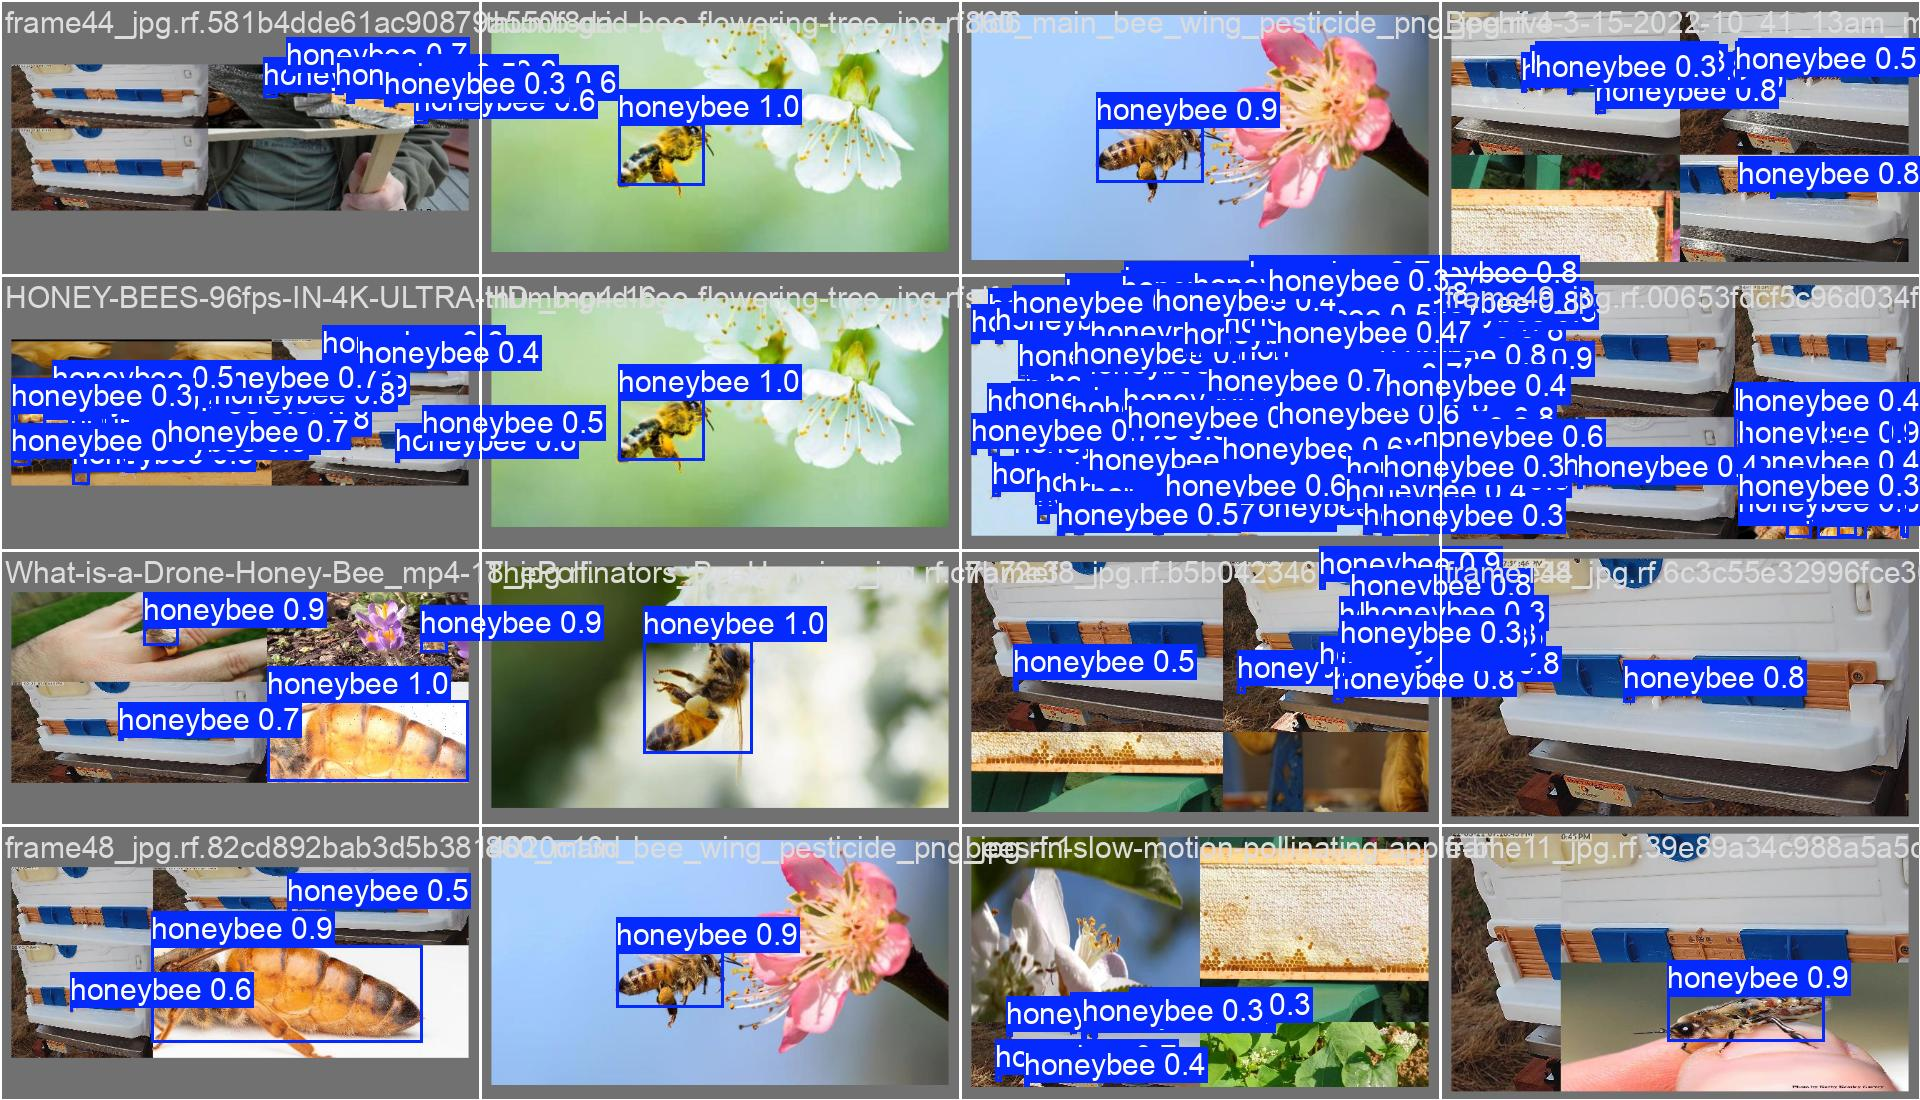

In [ ]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

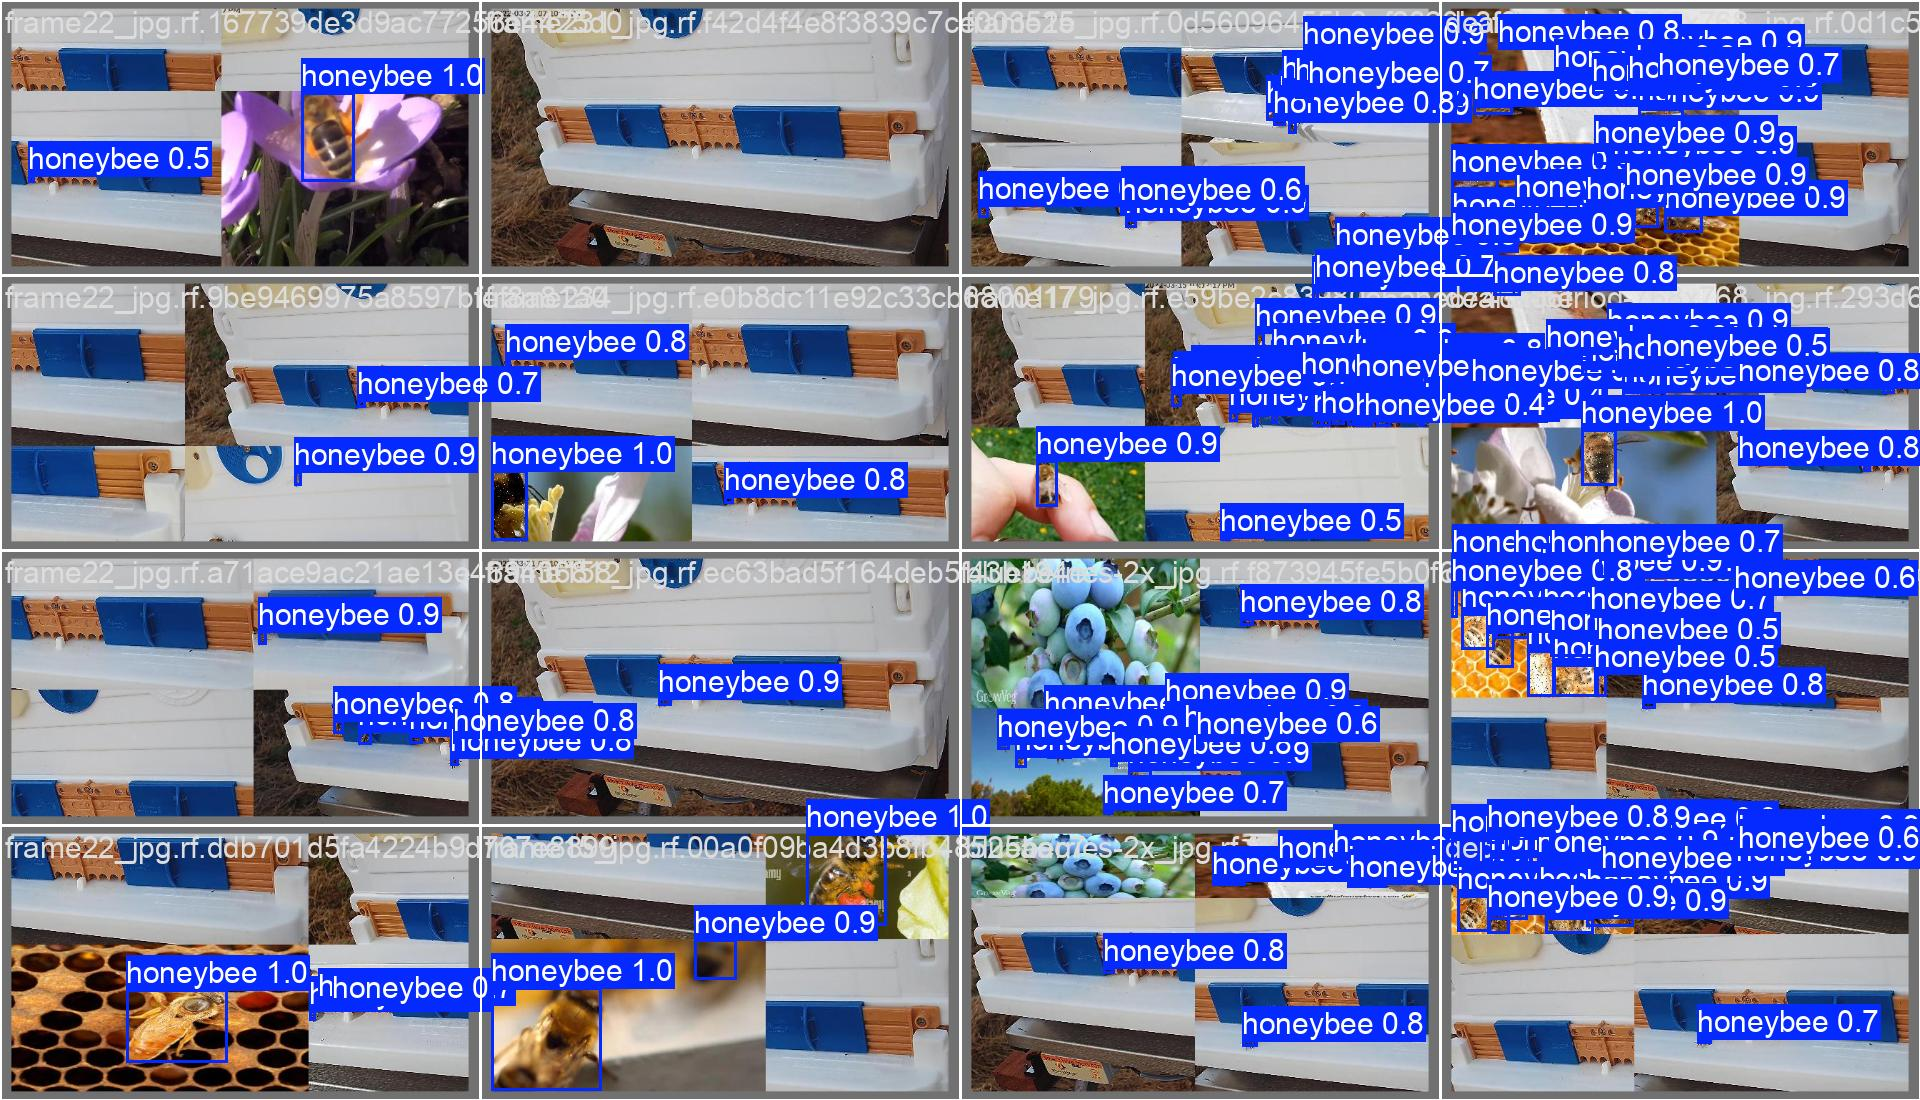

In [ ]:
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=600)

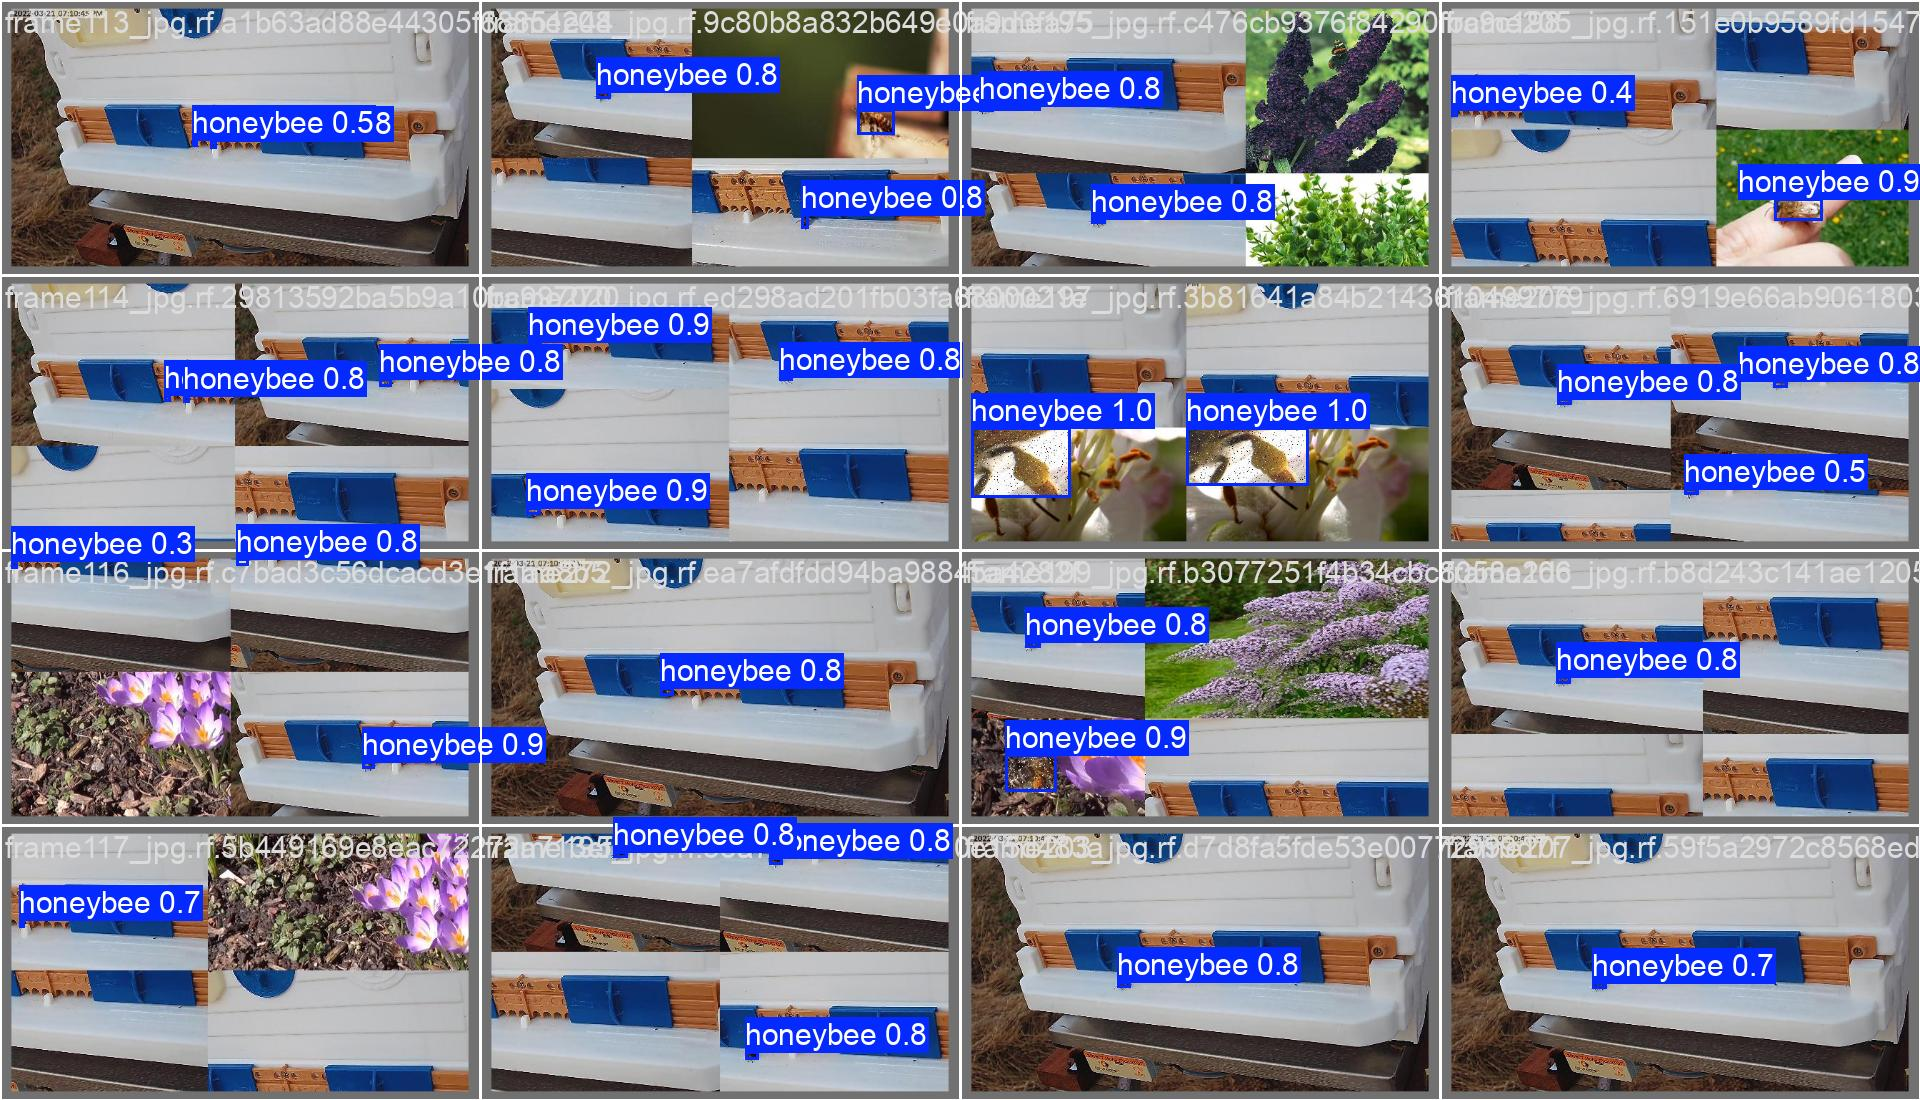

In [ ]:
Image("/content/runs/detect/train/val_batch2_pred.jpg", width=600)

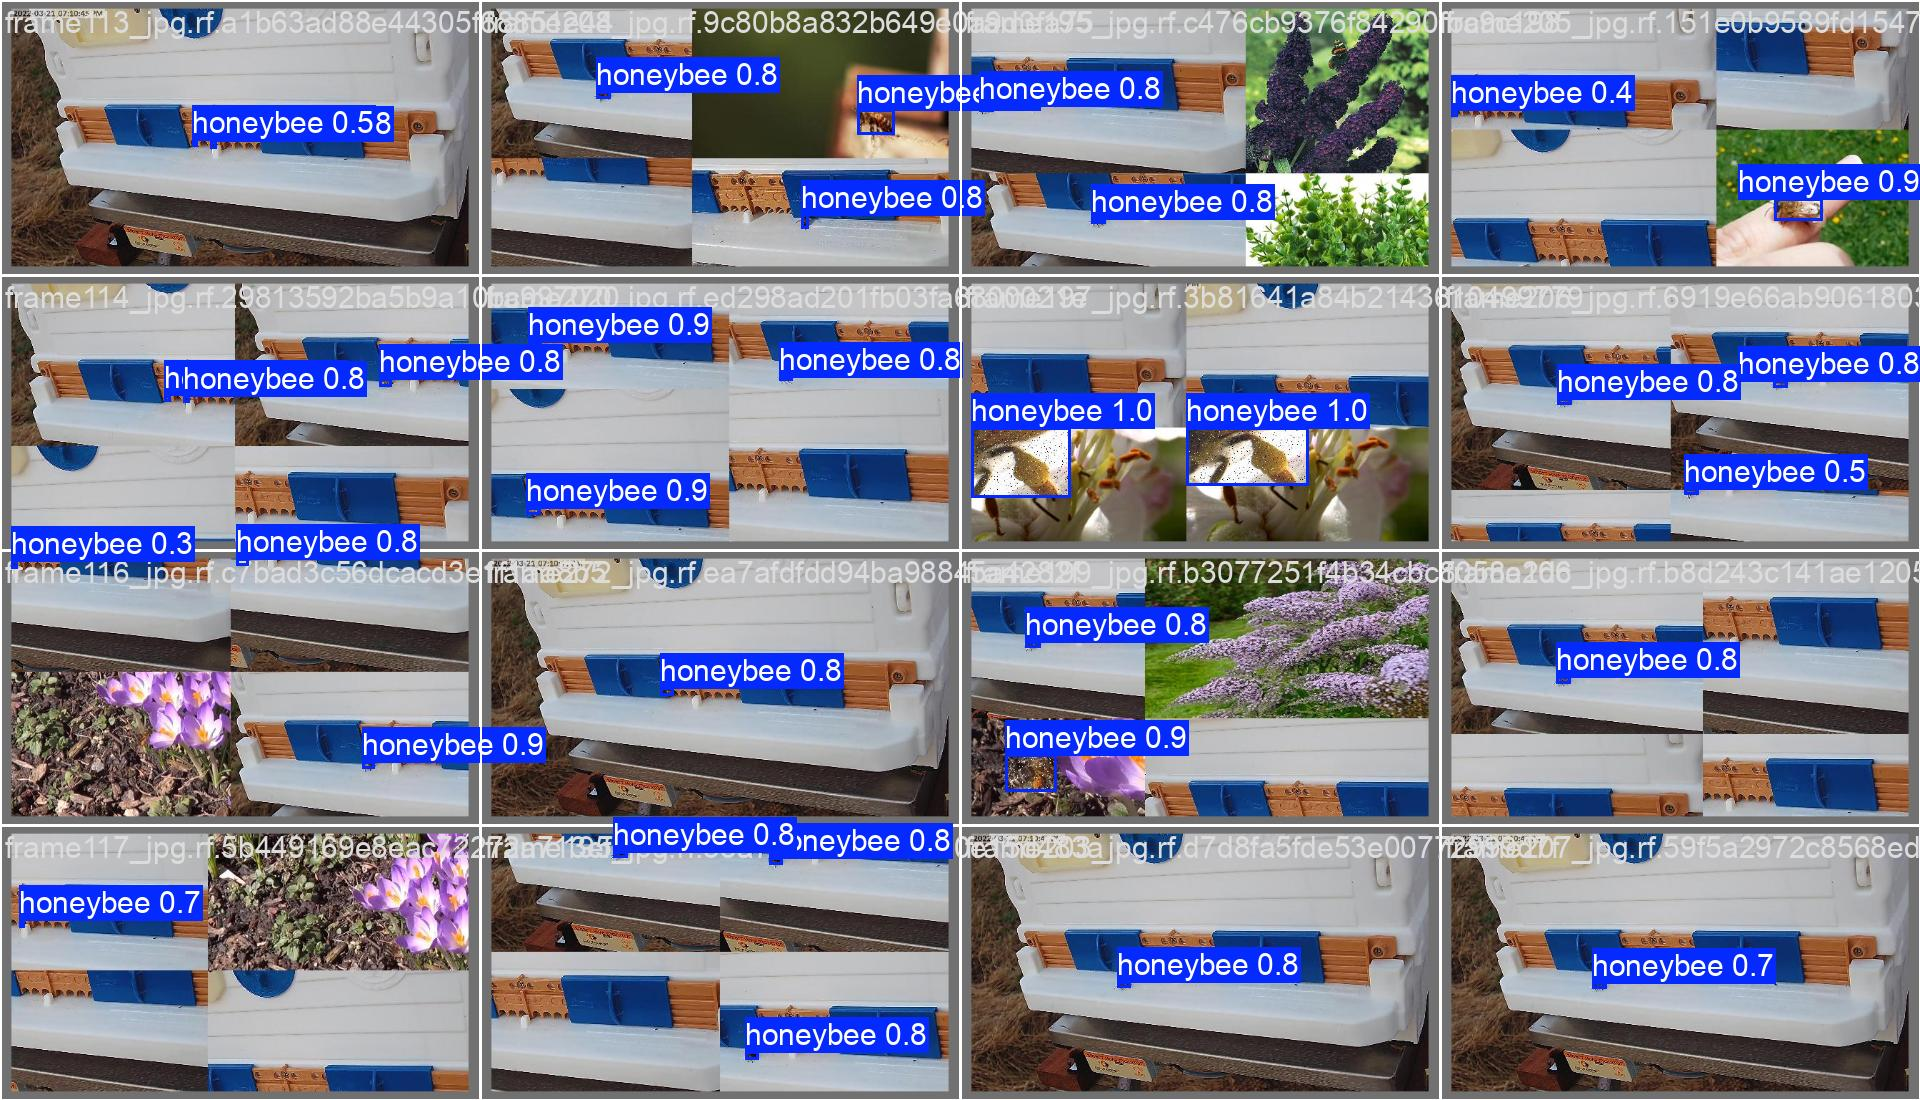

In [ ]:
Image("/content/runs/detect/train/val_batch2_pred.jpg", width=1000)


image 1/1 /content/honeybee.jpeg: 480x640 7 honeybees, 41.5ms
Speed: 2.3ms preprocess, 41.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
Number of detected honeybees: 7


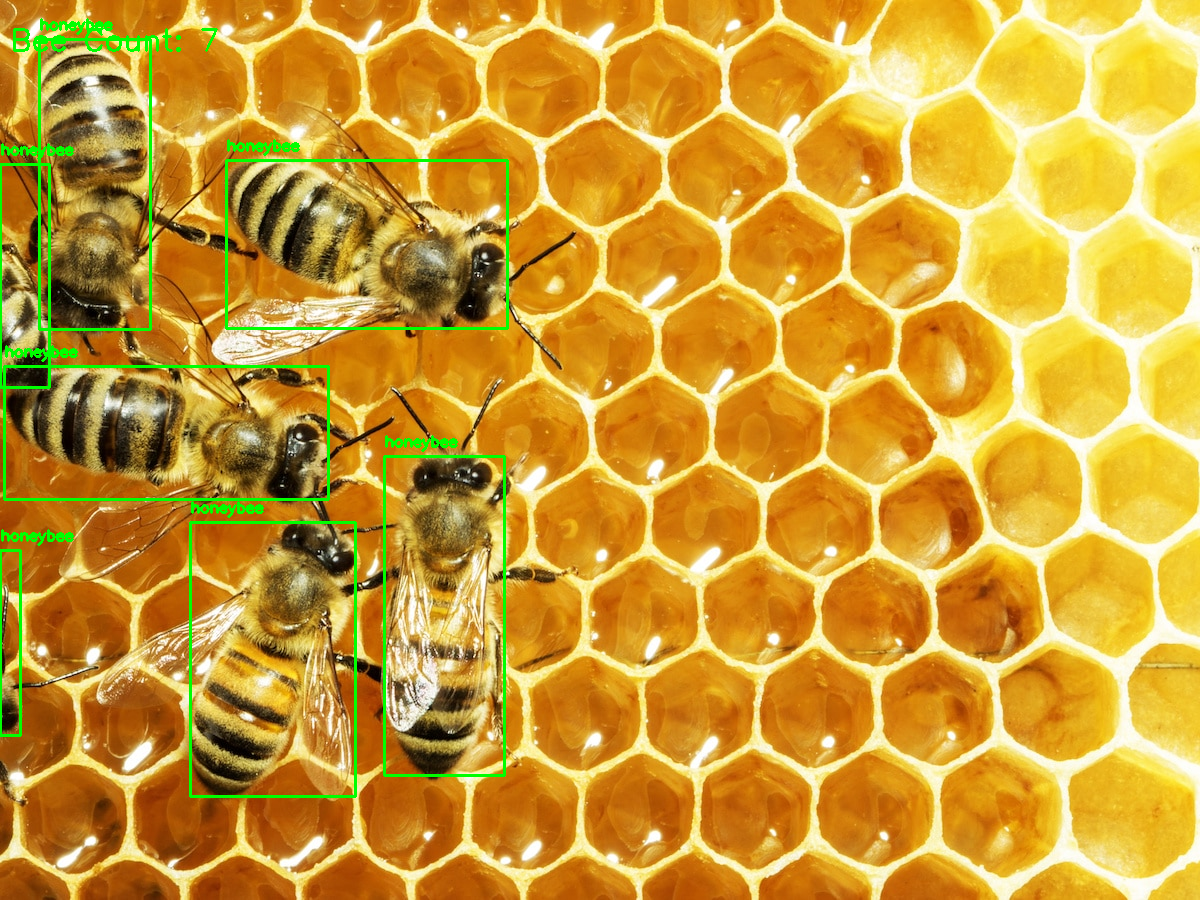

In [ ]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow  # Import cv2_imshow

# Function to calculate IoU (Intersection over Union)
def calculate_iou(box1, box2):
    # Unpack box coordinates
    x1_min, y1_min, x1_max, y1_max = box1
    x2_min, y2_min, x2_max, y2_max = box2

    # Calculate intersection
    inter_x_min = max(x1_min, x2_min)
    inter_y_min = max(y1_min, y2_min)
    inter_x_max = min(x1_max, x2_max)
    inter_y_max = min(y1_max, y2_max)

    if inter_x_max <= inter_x_min or inter_y_max <= inter_y_min:
        return 0.0  # No intersection

    inter_area = (inter_x_max - inter_x_min) * (inter_y_max - inter_y_min)

    # Calculate union
    box1_area = (x1_max - x1_min) * (y1_max - y1_min)
    box2_area = (x2_max - x2_min) * (y2_max - y2_min)
    union_area = box1_area + box2_area - inter_area

    return inter_area / union_area  # IoU

# Load the model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Run inference
image_path = "/content/honeybee.jpeg"  # Replace with your image path
results = model.predict(source=image_path, conf=0.25, show=False)

# Extract detections and map all classes to "honeybee"
bee_count = 0
detections = results[0]
unique_boxes = []  # To store non-overlapping boxes

annotated_image = cv2.imread(image_path)  # Load the original image for custom drawing

for box in detections.boxes:
    # Get box coordinates and class ID
    x1, y1, x2, y2 = box.xyxy[0]  # Bounding box coordinates
    class_id = int(box.cls[0])    # Get class ID

    # Check for overlaps (IoU) and count only unique detections
    is_unique = True
    for unique_box in unique_boxes:
        iou = calculate_iou((x1, y1, x2, y2), unique_box)
        if iou > 0.5:  # IoU threshold to consider overlapping boxes
            is_unique = False
            break

    if is_unique:
        unique_boxes.append((x1, y1, x2, y2))
        bee_count += 1
        # Draw bounding boxes and label as "honeybee"
        cv2.rectangle(annotated_image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)  # Green box
        cv2.putText(
            annotated_image,
            "honeybee",
            (int(x1), int(y1) - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (0, 255, 0),
            2
        )

print(f"Number of detected honeybees: {bee_count}")

# Add overall count to the image
cv2.putText(
    annotated_image,
    f"Bee Count: {bee_count}",
    (10, 50),
    cv2.FONT_HERSHEY_SIMPLEX,
    1,
    (0, 255, 0),
    2
)

# Display the annotated image
cv2_imshow(annotated_image)  # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()
